# Dimensionality Reduction with PCA and t-SNE on MNIST handwritten digit

Dimensionality is the number of dimensions, features, or variables associated with a sample of data.
Methods are commonly divided into linear and non-linear approaches. Approaches can also be divided into feature selection and feature extraction.

Applications of Dimensionality Reduction:
    1. feature engineering
    2. Noise reduction
    3. Generating plausible artificial datasets
    4. Financial modelling/risk analysis
    

In [1]:
# Data Set : MNIST handwritten digit classification
url="https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra"

The MNIST handwritten digit dataset is one of the most famous image recognition datasets. It consists of square images, 8 x 8 pixels, each containing a single handwritten digit. Thus, the dataset features are an 8 by 8 matrix, containing each pixel's color in grayscale. The target consists of 10 classes, one for each digit from 0 to 9.  32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16.

In [23]:
# toolboxes/libraries
import pandas as pd
import numpy as np

# Visualization libraries

import matplotlib.pyplot as plt 
import matplotlib.patheffects as PathEffects
import matplotlib
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# from sklearn.decomposition import TruncatedSVD as SVD



In [3]:
# import data
df =pd.read_csv(url, header=None)

In [4]:
# check data
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [5]:
# show data type of each attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823 entries, 0 to 3822
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3823 non-null   int64
 1   1       3823 non-null   int64
 2   2       3823 non-null   int64
 3   3       3823 non-null   int64
 4   4       3823 non-null   int64
 5   5       3823 non-null   int64
 6   6       3823 non-null   int64
 7   7       3823 non-null   int64
 8   8       3823 non-null   int64
 9   9       3823 non-null   int64
 10  10      3823 non-null   int64
 11  11      3823 non-null   int64
 12  12      3823 non-null   int64
 13  13      3823 non-null   int64
 14  14      3823 non-null   int64
 15  15      3823 non-null   int64
 16  16      3823 non-null   int64
 17  17      3823 non-null   int64
 18  18      3823 non-null   int64
 19  19      3823 non-null   int64
 20  20      3823 non-null   int64
 21  21      3823 non-null   int64
 22  22      3823 non-null   int64
 23  23      3823 

In [6]:
# rename columns
df.columns = ["X" + str(i) for i in range(0, len(df.columns)-1)] + ["class"]
df.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50',
       'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60',
       'X61', 'X62', 'X63', 'class'],
      dtype='object')

In [7]:
df['class'].value_counts()

3    389
1    389
7    387
4    387
9    382
8    380
2    380
6    377
5    376
0    376
Name: class, dtype: int64

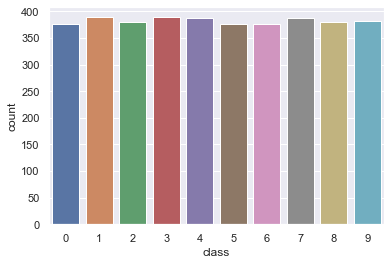

In [8]:
sns.countplot(data=df, x="class")

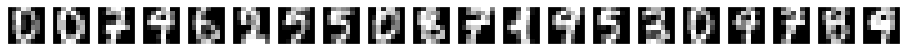

In [9]:
# Display images first 20 rows of last columns
fig, ax = plt.subplots(
    nrows=1,
    ncols=20,
    figsize=(16,4),
    subplot_kw=dict(xticks=[], yticks=[]) )

for i in np.arange(20):
    ax[i].imshow(df.to_numpy()[i,0:-1].reshape(8,8), cmap=plt.cm.gray ) # display last columns

### Splitting the Data-Set into Training Set and Test Set

In [10]:
X = df.iloc[:,:-1]  # feature
y = df['class'] # target

# in this our main data is splitted into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=100)
# we can check their dimension
print(X_train.shape)
print(X_test.shape)

(3058, 64)
(765, 64)


## Principal Component Analysis (PCA)

PCA is a projection technique which find a projection of the data in a smaller dimension. The idea is to find an axis in the data with highest variance and to map the data along that axis.

PCA is a method of obtaining important variables (in form of components) from a large set of variables available in a data set. It extracts low dimensional set of features by taking a projection of irrelevant dimensions from a high dimensional data set with a motive to capture as much information as possible.
https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/

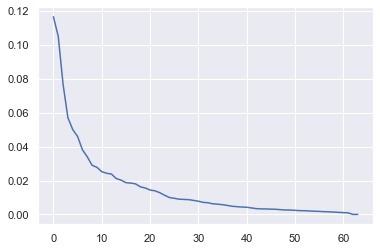

In [11]:
#  Perform PCA - principle component analysis
df_sc = StandardScaler().fit_transform(X_train)  # scale the features

pca = PCA()

df_pca = pca.fit_transform(df_sc)

plt.plot(pca.explained_variance_ratio_)

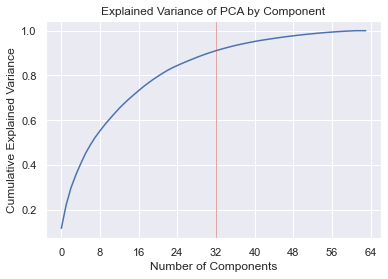

In [12]:
# http://jmausolf.github.io/code/pca_in_python/
# Variance Explained
# Related to scree plots and eigenvalues is the variance explained (which is directly related to the eigenvalues). This can also be visualized.
def var_explained():
    import numpy as np
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.axvline(x=32, linewidth=1, color='r', alpha=0.5)
    plt.title('Explained Variance of PCA by Component')
    show()

var_explained()

In [13]:
print([(j, np.cumsum(pca.explained_variance_ratio_)[j]) for j in range(len(pca.explained_variance_ratio_[:33]))])

[(0, 0.11657696556828603), (1, 0.22160470407671046), (2, 0.29827301661818223), (3, 0.35529102833358844), (4, 0.4053254682534876), (5, 0.4513060141174505), (6, 0.48946402179376824), (7, 0.5234513904609399), (8, 0.5524342384413413), (9, 0.5802277538040684), (10, 0.6054420020280399), (11, 0.6297127294746467), (12, 0.6535477156619156), (13, 0.6747075116147387), (14, 0.6949455716994426), (15, 0.713674964676129), (16, 0.7321696679743905), (17, 0.750185754278794), (18, 0.7664574653067939), (19, 0.7820294701397775), (20, 0.7964149234317315), (21, 0.8103365337666557), (22, 0.8231605301273011), (23, 0.83449217818704), (24, 0.8444707715755518), (25, 0.8539885725505466), (26, 0.8629842439386259), (27, 0.8718343114610511), (28, 0.8805508791964048), (29, 0.8888212046258606), (30, 0.8966072243831728), (31, 0.9036995459488981), (32, 0.9105844837502219)]


Here 32 components explain the almost 97% variance. So we can reduce the dimension according to the required variance.  Surprisingly, 4 components would explain almost 54% of the variance.

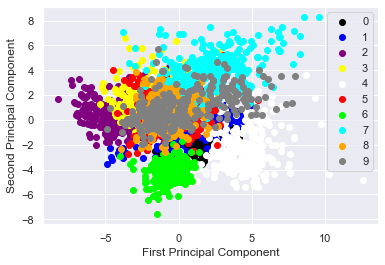

In [14]:
# https://www.programmersought.com/article/84117014666/

# Display the first 2 dimensional spatial distribution of 10 types of handwritten digital pictures after PCA compression.
#Define the color of the scatter plot points, draw black points when i takes 0, and so on.

def plot_pca_scatter():

    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = df_pca[:, 0][np.array(y_train) == i]
        py = df_pca[:, 1][np.array(y_train)== i]
        plt.scatter(px, py, c=colors[i])
    
    plt.legend(np.arange(0,10).astype(str))
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()
    
plot_pca_scatter()

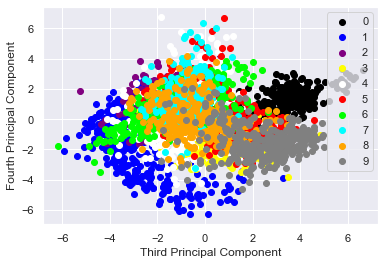

In [15]:
# Display the next 2 dimensional spatial distribution
def plot_pca_scatter2():

    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = df_pca[:, 2][np.array(y_train) == i]
        py = df_pca[:, 3][np.array(y_train)== i]
        plt.scatter(px, py, c=colors[i])
    
    plt.legend(np.arange(0,10).astype(str))
    plt.xlabel('Third Principal Component')
    plt.ylabel('Fourth Principal Component')
    plt.show()
    
plot_pca_scatter2()

### Limitations of PCA

PCA is a linear algorithm. It will not be able to interpret complex polynomial relationship between features. On the other hand, t-SNE is based on probability distributions with random walk on neighborhood graphs to find the structure within the data.

A major problem with, linear dimensionality reduction algorithms is that they concentrate on placing dissimilar data points far apart in a lower dimension representation. But in order to represent high dimension data on low dimension, non-linear manifold, it is important that similar datapoints must be represented close together, which is not what linear dimensionality reduction algorithms do.

https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. It maps multi-dimensional data to lower dimensions which are easy to visualize.

It is extensively applied in Image processing, NLP, genomic data and speech processing. It has been utilized for improving the analysis of brain and heart scans

In [33]:
# t-SNE stands for t-Distributed Stochastic Neighbor Embedding
df_nm = MinMaxScaler().fit_transform(X_train)  # scale the features

df_tsne = TSNE(n_components = 2,perplexity=50, random_state=1).fit_transform(df_nm)

In [29]:
## Another Option to normalize values

# scaler = Normalizer().fit(X_train)
# df_tsne = scaler.transform(X_train)

In [34]:
# https://www.oreilly.com/content/an-illustrated-introduction-to-the-t-sne-algorithm/
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(-6.101038, -59.29836, '0'),
  Text(19.07313, 17.703918, '1'),
  Text(-0.3835599, 53.015648, '2'),
  Text(-25.2574, 15.716663, '3'),
  Text(25.51612, -21.621166, '4'),
  Text(-7.6455746, -19.38291, '5'),
  Text(-49.256035, -15.23832, '6'),
  Text(50.90856, 4.9758234, '7'),
  Text(1.3562926, 23.796827, '8'),
  Text(-7.913535, 0.5799562, '9')])

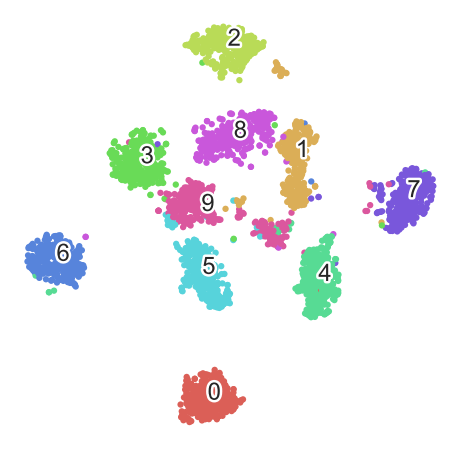

In [35]:
scatter(df_tsne, y_train)

Requirement already up-to-date: yellowbrick in c:\programdata\anaconda3\lib\site-packages (1.3.post1)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

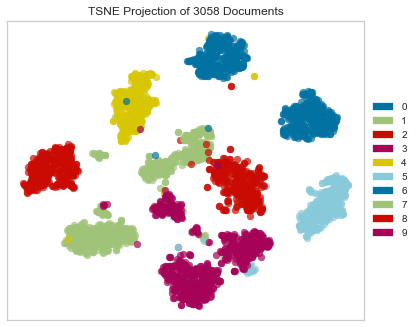

In [41]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install -U yellowbrick

from yellowbrick.text import TSNEVisualizer

# https://www.scikit-yb.org/en/latest/api/text/tsne.html
# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X_train, y_train)
tsne.show()

t-SNE outputs provide better results than PCA and other linear dimensionality reduction models. This is because a linear method such as classical scaling is not good at modeling curved manifolds. It focuses on preserving the distances between widely separated data points rather than on preserving the distances between nearby data points.
https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/